# Scikit-learn-Random Forest

### Random Forest: This model builds an ensemble (group, collection, user defined amount) of decision trees which will then output a prediction value. 

### Key Points: Random Forests are built from random samples of data and random selection of variables. Then the trees vote on their output. 

### The benefit of random forests is that the majority vote should correct single inccorect decision trees.

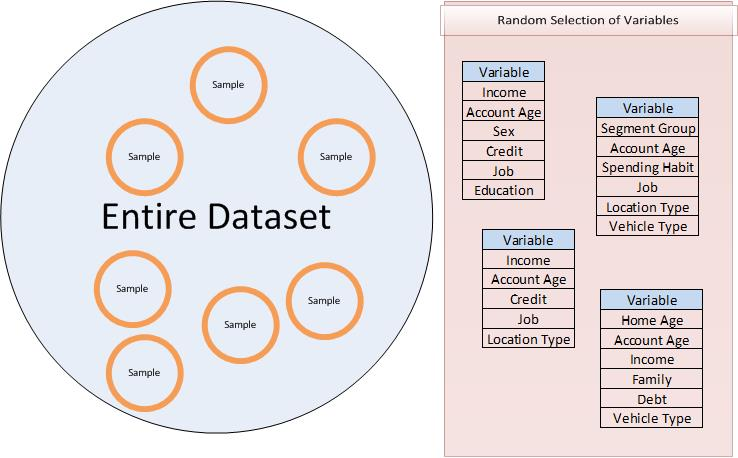

In [1]:
from IPython.display import Image
Image(filename='F:\\Data\\Mini Data Requests\\Forest.jpg')

### In this abovie example we can see that this randomforest is taking n amount of samples (Orange Circles) from the entire data set. Then it is randomly selecting variables to predict Y. Now after one grows n amount of trees a given input record is ran through the forest and majority vote decides on the prediction or classification.  

In [2]:
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np

In [3]:
# Read in File
Iris = pd.read_csv('R:\\Data\\cs\\Advanced Metering\\CHM\\PsuedoDataForCode\\Iris.csv')

# transform into matrix
Matrix = Iris.values

# Select our features (predictors)
MatrixFeatures = Matrix[:,[0,1,2,3]]
# Select our target
MatrixTarget = Matrix[:,[4]]

In [4]:
a_train, a_test, b_train, b_test = train_test_split(MatrixFeatures, MatrixTarget, test_size=0.75)
print "a_train" + str(a_train.shape)
print "a_test" + str( a_test.shape)
print ""
print "b_train" + str( b_train.shape)
print "b_test" + str(b_test.shape)

a_train(37L, 4L)
a_test(113L, 4L)

b_train(37L, 1L)
b_test(113L, 1L)


In [5]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(a_train,np.ravel(b_train))
Z_One = rf.predict(a_test)

In [6]:
et = ExtraTreesClassifier(n_estimators=500)
et.fit(a_train,np.ravel(b_train))
Z_Two = et.predict(a_test)

In [7]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=500)
ada.fit(a_train,np.ravel(b_train))
Z_Three = ada.predict(a_test)

In [8]:
df = pd.DataFrame(Z_One) 
df =df.reset_index()
df1 = pd.DataFrame(b_test) 
df1 =df1.reset_index()
merged_one = df.merge(df1,on='index') 

df = pd.DataFrame(Z_Two) 
df =df.reset_index()
df1 = pd.DataFrame(b_test) 
df1 =df1.reset_index()
merged_two = df.merge(df1,on='index') 

df = pd.DataFrame(Z_Three) 
df =df.reset_index()
df1 = pd.DataFrame(b_test) 
df1 =df1.reset_index()
merged_three = df.merge(df1,on='index') 

In [9]:
print "Random Forest"
merged_one.rename(columns={'0_x':'Pred'}, inplace=True)
merged_one.rename(columns={'0_y':'Actual'}, inplace=True)
pd.crosstab(merged_one.Pred, merged_one.Actual)

Random Forest


Actual,setosa,versicolor,virginica
Pred,,,
setosa,39,0,0
versicolor,0,33,6
virginica,0,1,34


In [10]:
print "Extra Tree Classifier"
merged_two.rename(columns={'0_x':'Pred'}, inplace=True)
merged_two.rename(columns={'0_y':'Actual'}, inplace=True)
pd.crosstab(merged_two.Pred, merged_two.Actual)

Extra Tree Classifier


Actual,setosa,versicolor,virginica
Pred,,,
setosa,39,0,0
versicolor,0,33,4
virginica,0,1,36


In [11]:
print "Adaboost"
merged_three.rename(columns={'0_x':'Pred'}, inplace=True)
merged_three.rename(columns={'0_y':'Actual'}, inplace=True)
pd.crosstab(merged_three.Pred, merged_three.Actual)

Adaboost


Actual,setosa,versicolor,virginica
Pred,,,
setosa,39,0,0
versicolor,0,33,5
virginica,0,1,35
